In [138]:
### Import des packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
import sklearn

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [114]:
df_train = pd.read_csv("train_data.csv")
df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


# 1. Nettoyage des Outliers

<Axes: xlabel='Age'>

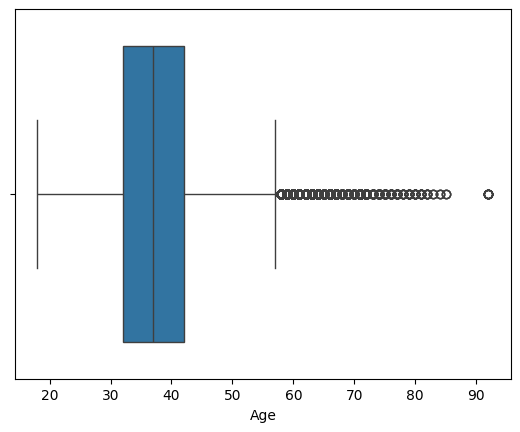

In [115]:
# Pour la variable Age

sns.boxplot(x="Age", data=df_train)


In [117]:
age = df_train["Age"]

q1 = age.quantile(0.25)
q3 = age.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_train.query("Age < @lower_bound | Age > @upper_bound")

df_train = df_train.query("Age > @lower_bound | Age < @upper_bound")

<Axes: xlabel='Balance'>

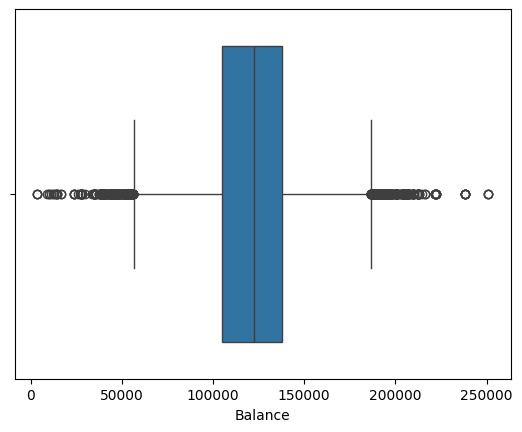

In [118]:
# Pour la variable Balance

sns.boxplot(x="Balance", data=df_train.query("Balance > 0"))

In [119]:
balancePositif = df_train.query("Balance > 0")["Balance"]

q1 = balancePositif.quantile(0.25)
q3 = balancePositif.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_train.query("Balance > 0 and (Balance < @lower_bound or Balance > @upper_bound)")
df_train = df_train.query("Balance == 0 or (Balance > @lower_bound and Balance < @upper_bound)")
df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


# 2. Encoding

In [120]:
print(df_train.columns)


Index(['ID', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [121]:
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder.fit_transform(df_train[["Gender", "Geography"]])


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 1.],
       [0., 0., 0.],
       [0., 1., 0.]], shape=(142924, 3))

## 3. Feature Engineering

1er idée : Créer une variable binaire pour les Balance = 0 et une autre BalancePositive pour les Balance > 0

In [122]:
df_train["BalanceNull"] = (df_train["Balance"] == 0).astype(int)

df_train


,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceNull
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0,1
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0,1
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1,0
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0,0


# 3. Scaling (Normalisation)

In [94]:
df_numeric = df_train[["Age", "Balance", "NumOfProducts"]]

scaler = StandardScaler()
scaler.fit(df_numeric)
df_standard = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)



In [95]:
scaler = MinMaxScaler()
scaler.fit(df_numeric)
df_MinMax = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

In [96]:
df_standard.describe()

,Age,Balance,NumOfProducts
count,1.429240e+05,1.429240e+05,1.429240e+05
mean,-6.194455e-17,-8.499975e-17,-2.754196e-17
std,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.271078e+00,-8.824179e-01,-1.015145e+00
25%,-6.922167e-01,-8.824179e-01,-1.015145e+00
50%,-1.283375e-01,-8.824179e-01,8.154179e-01
75%,4.355416e-01,1.030292e+00,8.154179e-01
max,6.074333e+00,2.097515e+00,4.476544e+00


In [97]:
df_MinMax.describe()

,Age,Balance,NumOfProducts
count,142924.000000,142924.000000,142924.000000
mean,0.272135,0.296120,0.184851
std,0.119827,0.335579,0.182094
min,0.000000,0.000000,0.000000
25%,0.189189,0.000000,0.000000
50%,0.256757,0.000000,0.333333
75%,0.324324,0.641863,0.333333
max,1.000000,1.000000,1.000000


## Age

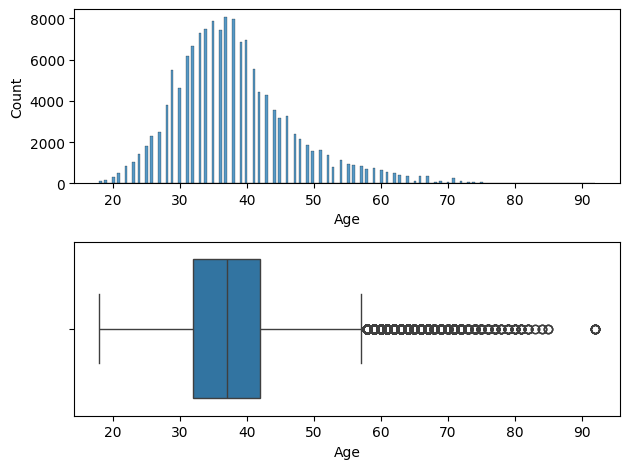

In [98]:
# Age

fig, ax = plt.subplots(2,1)

sns.histplot(data = df_numeric, x="Age", ax=ax[0])
sns.boxplot(data=df_numeric, x="Age", ax=ax[1])
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Count'>

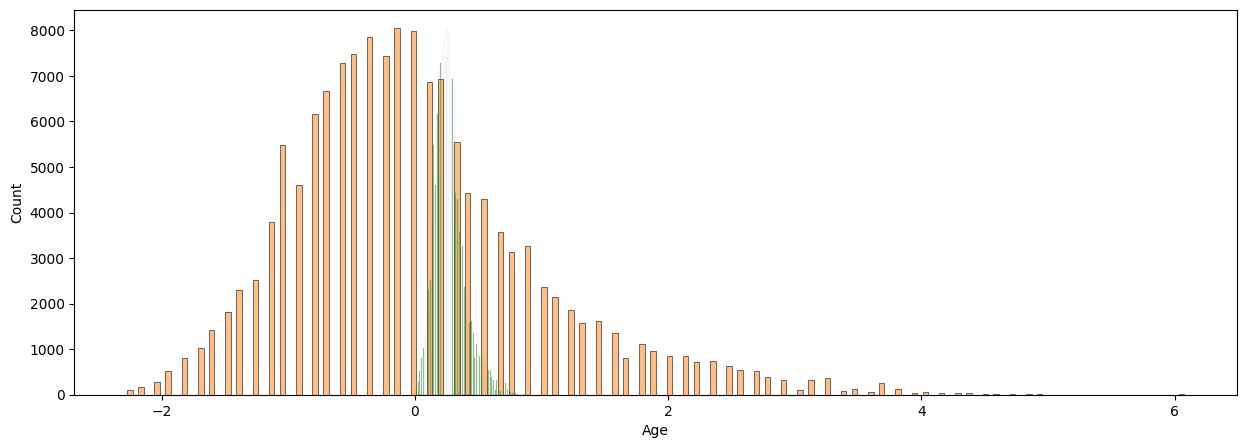

In [99]:
plt.figure(figsize=(15, 5))

#sns.histplot(data = df_numeric, x="Age", color="tab:blue", alpha=0.5)
sns.histplot(data = df_standard, x="Age", color="tab:orange", alpha=0.5)
sns.histplot(data = df_MinMax, x="Age", color="tab:green", alpha=0.5)

In [100]:
df_standard.describe()

,Age,Balance,NumOfProducts
count,1.429240e+05,1.429240e+05,1.429240e+05
mean,-6.194455e-17,-8.499975e-17,-2.754196e-17
std,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.271078e+00,-8.824179e-01,-1.015145e+00
25%,-6.922167e-01,-8.824179e-01,-1.015145e+00
50%,-1.283375e-01,-8.824179e-01,8.154179e-01
75%,4.355416e-01,1.030292e+00,8.154179e-01
max,6.074333e+00,2.097515e+00,4.476544e+00


## Balance

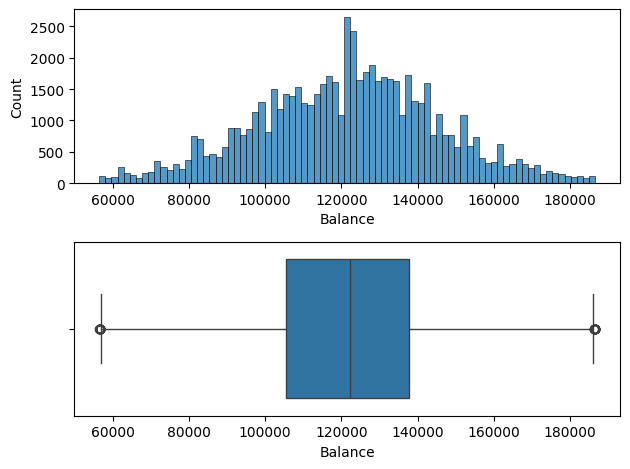

In [101]:
fig, ax = plt.subplots(2,1)

sns.histplot(df_train.query("Balance > 0")["Balance"], ax=ax[0])
sns.boxplot(x="Balance", data=df_train.query("Balance > 0"), ax=ax[1])
plt.tight_layout()

<Axes: xlabel='Balance', ylabel='Count'>

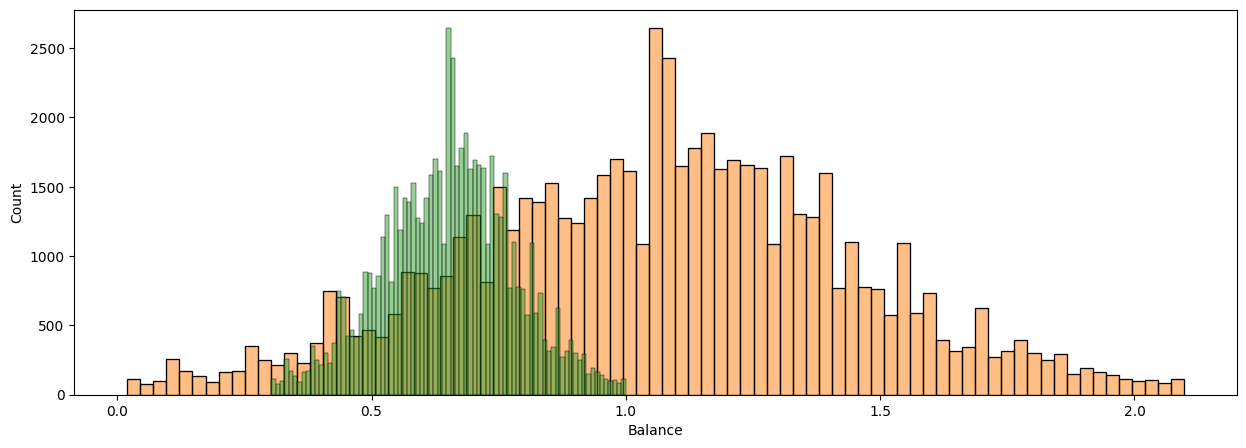

In [102]:
plt.figure(figsize=(15, 5))

#sns.histplot(data = df_numeric, x="Balance", color="tab:blue", alpha=0.5)
sns.histplot(data = df_standard.query("Balance > 0"), x="Balance", color="tab:orange", alpha=0.5)
sns.histplot(data = df_MinMax.query("Balance > 0"), x="Balance", color="tab:green", alpha=0.5)

## NumOfProducts

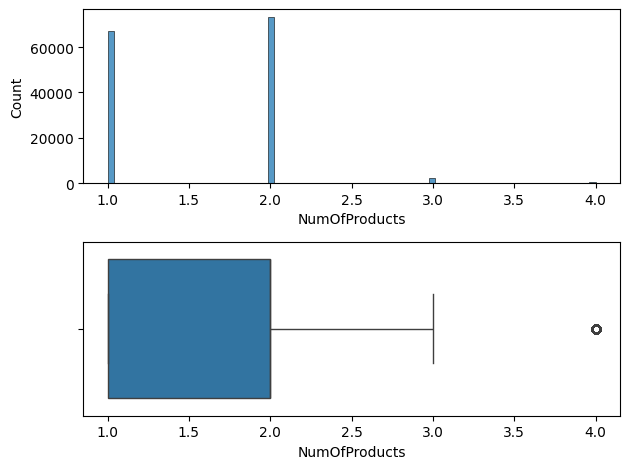

In [103]:
fig, ax = plt.subplots(2,1)

sns.histplot(df_train["NumOfProducts"], ax=ax[0])
sns.boxplot(x="NumOfProducts", data=df_train, ax=ax[1])
plt.tight_layout()

<Axes: xlabel='NumOfProducts', ylabel='Count'>

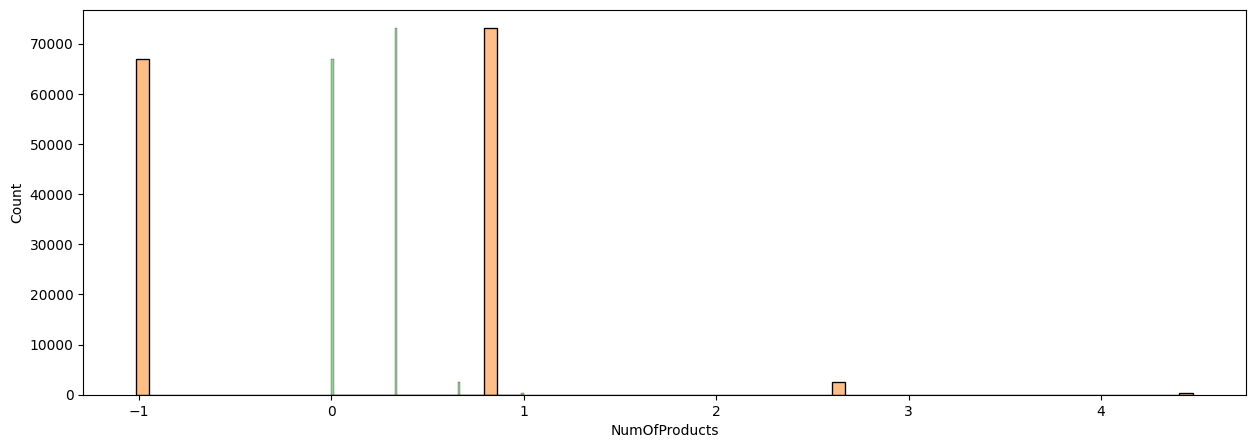

In [104]:
plt.figure(figsize=(15, 5))

#sns.histplot(data = df_numeric, x="NumOfProducts", color="tab:blue", alpha=0.5)
sns.histplot(data = df_standard, x="NumOfProducts", color="tab:orange", alpha=0.5)
sns.histplot(data = df_MinMax, x="NumOfProducts", color="tab:green", alpha=0.5)

In [124]:
cols_to_keep = [
    "Gender", "Geography",               # à encoder
    "Age", "Balance", "NumOfProducts",   # à scaler
    "IsActiveMember", "BalanceNull"      # à passer tel quel
]

df_final = df_train[cols_to_keep].copy()


In [133]:
column_transformer = ColumnTransformer(transformers=[
    ("encoder", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"), ["Gender", "Geography"]),
    ("MinMax_scaler", MinMaxScaler(),["Age", "Balance", "NumOfProducts"]),
], remainder="passthrough")

pipeline = Pipeline(steps=[
    ("column_transformer", column_transformer),
    ("classifier", LogisticRegression(max_iter=1000)),
])

pipeline

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography']),
                                                 ('MinMax_scaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Balance',
                                                   'NumOfProducts'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [134]:
# 1. Créer le DataFrame filtré avec les bonnes colonnes
cols_to_keep = ["Gender", "Geography", "Age", "Balance", "NumOfProducts", "BalanceNull", "IsActiveMember"]

X = df_train[cols_to_keep].copy()
y = df_train["Exited"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [135]:
# 3. Entraînement du pipeline
pipeline.fit(X_train, y_train)


/home/simon/projects/mlpro-classification-bank-churn-2025/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Geography']),
                                                 ('MinMax_scaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'Balance',
                                                   'NumOfProducts'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [140]:
y_pred = pipeline.predict(X_val)


In [142]:
# Accuracy
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy : {acc:.4f}")

# F1-score
f1 = f1_score(y_val, y_pred)
print(f"F1-score : {f1:.4f}")

Accuracy : 0.8327
F1-score : 0.4938
